In [1]:
######################
#import useful modules
######################

import sys 
#sys.path.append('/home2/datahome/tpicard/Pyticles/Modules/')
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')

from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

simulname is None
args (['apero', '[0,10000,0,10000,[1,100,1]]', '5170'],)
args[0] ['apero', '[0,10000,0,10000,[1,100,1]]', '5170']
len(args[0]) 3
time of simulation is: 5170
coord
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
get domain [0,10000,0,10000,[1,100,1]] [0,10
coordmax
loading /home/datawork-lops-osi/mlecorre/POLGYR/INIT/polgyr_grd.nc
loading /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.Cs_r
dt
dt is read in  /home/datawork-lops-osi/mlecorre/POLGYR/HIS/polgyr_his.05160.nc
[0, 1602, 0, 2002, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 7

# LOAD SIMULATION DATA

In [ ]:
# SUBDOMAIN
t_date = 5170
my_simul = 'apero'
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(0,10000,0,10000,)
parameters = my_simul +str_para+ format(t_date)
simul_rrex = load(simul = parameters, floattype=np.float64)
depth = 0
#z_r,z_w = tools.get_depths(simul_rrex)
#tpas = var('tpas01',simul_rrex).data
#mld_d = var('hbls_rho',simul_rrex).data
u = var('u',simul_rrex,depths=[0]).data
v = var('v',simul_rrex,depths=[0]).data
strain_rrex =  tools.get_strain(u,v,simul_rrex.pm,simul_rrex.pn) / simul_rrex.f
vrt_rrex =  tools.psi2rho(tools.get_vrt(u,v,simul_rrex.pm,simul_rrex.pn) / tools.rho2psi(simul_rrex.f))

##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

lon_rrex = simul_rrex.x; lat_rrex = simul_rrex.y

[lon_km_rrex,lat_km_rrex] = np.meshgrid(np.arange(simul_rrex.x.shape[0])+simul_rrex.coord[2],np.arange(simul_rrex.x.shape[1])+simul_rrex.coord[0])
lon_km_rrex = (lon_km_rrex/np.mean(simul_rrex.pm)*1e-3).T
lat_km_rrex = (lat_km_rrex/np.mean(simul_rrex.pn)*1e-3).T

[ic,jc] = np.load('/home2/datahome/tpicard/Pyticles/Inputs/ic_jc.npy')
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-260,jc+260,ic-260,ic+260)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64)

coord = 'deg'
lon_pap = simul_pap.x; lat_pap = simul_pap.y
[lon_km_pap,lat_km_pap] = np.meshgrid(np.arange(simul_pap.x.shape[0])+simul_pap.coord[2],np.arange(simul_pap.x.shape[1])+simul_pap.coord[0])
lon_km_pap = (lon_km_pap/np.mean(simul_pap.pm)*1e-3).T
lat_km_pap = (lat_km_pap/np.mean(simul_pap.pn)*1e-3).T

simul = load(simul = 'gigatl3_rrexnum',time = 0, light=False, output=True) #start 30/12/2007
temp = var('temp',simul).data
u = var('u',simul,depths=[0]).data
v = var('v',simul,depths=[0]).data
strain =  tools.get_strain(u,v,simul.pm,simul.pn) / simul.f
vrt =  tools.psi2rho(tools.get_vrt(u,v,simul.pm,simul.pn) / tools.rho2psi(simul.f))
##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'

print('----- DONE ----- ')


# CHECK THE DATE

In [21]:
simul = load(simul = 'gigatl3_rrexnum',time = 0, light=False, output=False) #start 30/12/2007
vrt =  tools.psi2rho(tools.get_vrt(u,v,simul.pm,simul.pn) / tools.rho2psi(simul.f))
print(simul.date,simul.year)

t_date = 5170
my_simul = 'apero'
#parameters = my_simul + ' [1068,2068,117,1117,[1,100,1]] '+ format(date_plot_AC)
str_para = ' [{0},{1},{2},{3},[1,100,1]] '.format(jc-260,jc+260,ic-260,ic+260)
parameters = my_simul +str_para+ format(t_date)
simul_pap = load(simul = parameters, floattype=np.float64,output =False)
print(simul_pap.date,simul_pap.year)




Feb 08 - 11:57 2008


# PLOT MAP

<ipython-input-2-42e272b51c52>:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=10000000/2,height=8000000/2,
<ipython-input-2-42e272b51c52>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
<ipython-input-2-42e272b51c52>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = m.

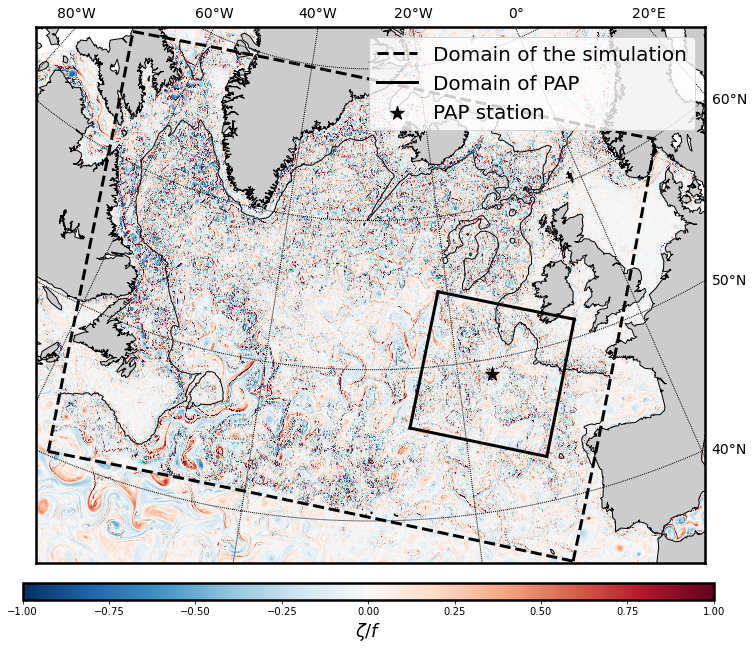

In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,12))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
ax2 = plt.gca()
gs = gridspec.GridSpec(8, 11)

m = Basemap(width=10000000/2,height=8000000/2,
            resolution='l',projection='lcc',\
            lat_ts=70,lat_0=55,lon_0=-29)

m.drawcoastlines()
# draw parallels and meridians.
m.fillcontinents()

m.drawparallels(np.arange(-80.,81.,10.),labels=[False,True,False,False], fontsize = 14)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[False,False,True,False], fontsize =14)
# labels = [left,right,top,bottom]

xx, yy = m(lon, lat)
xx_rrex, yy_rrex = m(lon_rrex, lat_rrex)
xx_pap, yy_pap = m(lon_pap, lat_pap)

mpos = m.plot(xx_rrex[:,0], yy_rrex[:,0],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[:,-1], yy_rrex[:,-1],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[0,:], yy_rrex[0,:],color='k',alpha=1,linestyle='--',linewidth=3)
mpos = m.plot(xx_rrex[-1,:], yy_rrex[-1,:],color='k',alpha=1,linestyle='--',linewidth=3,label='Domain of the simulation')

mpos = m.plot(xx_pap[:,0], yy_pap[:,0],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_pap[:,-1], yy_pap[:,-1],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_pap[0,:], yy_pap[0,:],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_pap[-1,:], yy_pap[-1,:],color='k',alpha=1,linestyle='-',linewidth=3,label='Domain of PAP')

#plt.legend(prop={'size': 20}, frameon=True,loc=8)
#mlim = m.plot(lon[:,0],lat[:,0],color='k',linewidth=100)
#mpos = m.pcolormesh(xx,yy,temp[:,:,-1],cmap = plt.cm.RdBu_r,vmin=0)

mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
#CS1 = m.contour(xx,yy,simul.topo,[2000],colors = ('k',), linewidths = (1,))

pc = m.pcolormesh(xx_rrex,yy_rrex,vrt_rrex,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
CS1 = m.contour(xx_rrex,yy_rrex,simul_rrex.topo,[1000],colors = ('k',), linewidths = (1,))

mpos = m.scatter(xx_rrex[ic,jc],yy_rrex[ic,jc],c = 'black',marker = '*',s = 200,label = 'PAP station')
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)

plt.legend(prop={'size': 20},loc = 'upper right')


x, y = m(-29, 54)
x2, y2 = m(-40, 40)


cbaxes = fig.add_axes([0.11, 0.15, 0.8, 0.02]) 
cb = plt.colorbar(pc,ax = ax2, cax = cbaxes,orientation="horizontal")  
cb.set_label(r'$\zeta/f$',fontsize=18)

#plt.savefig('map_atlantic_domain.png',dpi=400)